# Laboratorio 2

- Jorge Caballeros 20009
- Lucía Alejandra Guzmán 20262

In [18]:
# importing libraries
import pandas as pd

# Loading data

data = pd.read_csv('data.csv')

data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [19]:
# setting the columns we are gonna use for this lab
columns = ['production_date','genres','runtime_minutes','Production budget $','Worldwide gross $']

In [20]:
# Convert 'production_date' to datetime format and extract the month
data['production_month'] = pd.to_datetime(data['production_date']).dt.month

# One-hot encoding for 'genres' column (splitting by ',' and then getting dummies)
genres_dummies = data['genres'].str.get_dummies(sep=',')

# Normalize 'runtime_minutes' and 'Production budget $' columns
data['normalized_runtime'] = (data['runtime_minutes'] - data['runtime_minutes'].mean()) / data['runtime_minutes'].std()
data['normalized_budget'] = (data['Production budget $'] - data['Production budget $'].mean()) / data['Production budget $'].std()

# Create target variable: 1 if the movie was successful (net gain is positive), 0 otherwise
data['success'] = (data['Worldwide gross $'] - data['Production budget $'] > 0).astype(int)

# Concatenate original data with one-hot encoded genres
preprocessed_data = pd.concat([data, genres_dummies], axis=1)

# Display the first few rows of the preprocessed dataset
preprocessed_data.head()


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,\N
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,...,0,0,0,0,0,0,0,0,0,0
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,...,0,0,0,0,0,0,0,0,0,0
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,...,0,0,0,0,0,0,0,0,0,0
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,...,0,0,0,0,1,0,0,0,0,0
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = preprocessed_data[['production_month', 'normalized_runtime', 'normalized_budget'] + list(genres_dummies.columns)]
y = preprocessed_data['success']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3504, 27), (876, 27))

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

test_accuracy

0.6872146129608154

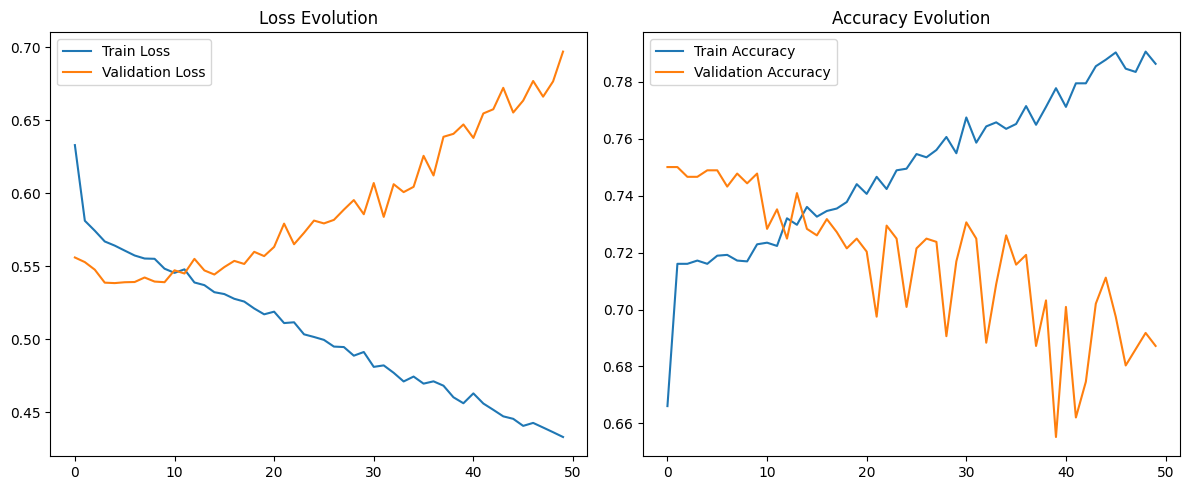

In [23]:
import matplotlib.pyplot as plt

# Evaluación del modelo con lotes
batch_size = 100  # Puedes ajustar este valor según tus necesidades
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

# Gráfica de la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()

# Gráfica de la precisión durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.tight_layout()
plt.show()
